# Available Data

In [24]:
import pandas as pd
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt 

In [15]:
a_train = pd.read_json('../../Conala Challenge/conala-corpus/conala-train.json')

### Annotated Conala training samples

In [16]:
a_train[:5]

,intent,question_id,rewritten_intent,snippet
0,How to convert a list of multiple integers int...,41067960,Concatenate elements of a list 'x' of multiple...,"sum(d * 10 ** i for i, d in enumerate(x[::-1]))"
1,How to convert a list of multiple integers int...,41067960,convert a list of integers into a single integer,"r = int(''.join(map(str, x)))"
2,how to convert a datetime string back to datet...,4170655,convert a DateTime string back to a DateTime o...,datetime.strptime('2010-11-13 10:33:54.227806'...
3,Averaging the values in a dictionary based on ...,29565452,get the average of a list values for each key ...,"[(i, sum(j) / len(j)) for i, j in list(d.items..."
4,zip lists in python,13704860,"zip two lists `[1, 2]` and `[3, 4]` into a lis...","zip([1, 2], [3, 4])"


In [17]:
for i in range(10):
    print("REWRITTEN INTENT: " + a_train.iloc[i]["rewritten_intent"])
    print("CODE: " + a_train.iloc[i]["snippet"])
    print()

REWRITTEN INTENT: Concatenate elements of a list 'x' of multiple integers to a single integer
CODE: sum(d * 10 ** i for i, d in enumerate(x[::-1]))

REWRITTEN INTENT: convert a list of integers into a single integer
CODE: r = int(''.join(map(str, x)))

REWRITTEN INTENT: convert a DateTime string back to a DateTime object of format '%Y-%m-%d %H:%M:%S.%f'
CODE: datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f')

REWRITTEN INTENT: get the average of a list values for each key in dictionary `d`)
CODE: [(i, sum(j) / len(j)) for i, j in list(d.items())]

REWRITTEN INTENT: zip two lists `[1, 2]` and `[3, 4]` into a list of two tuples containing elements at the same index in each list
CODE: zip([1, 2], [3, 4])

REWRITTEN INTENT: prepend string 'hello' to all items in list 'a'
CODE: ['hello{0}'.format(i) for i in a]

REWRITTEN INTENT: regex for repeating words in a string `s`
CODE: re.sub('(?<!\\S)((\\S+)(?:\\s+\\2))(?:\\s+\\2)+(?!\\S)', '\\1', s)

REWRITTEN INTENT: normali

In [18]:
print(len(a_train))

2379


### Mined Conala training samples

In [19]:
mined_train = pd.read_json('../../Conala Challenge/conala-corpus/conala-mined.jsonl', lines=True)

In [20]:
mined_train[:5]

,id,intent,parent_answer_post_id,prob,question_id,snippet
0,34705205347052328,Sort a nested list by two elements,34705233,0.869000,34705205,"sorted(l, key=lambda x: (-int(x[1]), x[0]))"
1,13905936139059460,converting integer to list in python,13905946,0.852670,13905936,[int(x) for x in str(num)]
2,13837848138380410,Converting byte string in unicode string,13838041,0.852143,13837848,c.decode('unicode_escape')
3,23490152234901792,List of arguments with argparse,23490179,0.850829,23490152,"parser.add_argument('-t', dest='table', help='..."
4,272178227218070,How to convert a Date string to a DateTime obj...,2721807,0.840372,2721782,"datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:..."


Note these questions have a probability field, showing how likely the example is to be correct.

In [21]:
for i in range(5):
    print("INTENT: " + mined_train.iloc[i]["intent"])
    print("CODE: " + mined_train.iloc[i]["snippet"])
    print()

INTENT: Sort a nested list by two elements
CODE: sorted(l, key=lambda x: (-int(x[1]), x[0]))

INTENT: converting integer to list in python
CODE: [int(x) for x in str(num)]

INTENT: Converting byte string in unicode string
CODE: c.decode('unicode_escape')

INTENT: List of arguments with argparse
CODE: parser.add_argument('-t', dest='table', help='', nargs='+')

INTENT: How to convert a Date string to a DateTime object?
CODE: datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ')



In [22]:
print(len(a_train))

2379


In [25]:
plt.hist(mined_train["prob"], bins=30)
plt.title('Probability of Accuracy for Mined Samples')
plt.xlabel('Accuracy')
plt.ylabel('Occurances')

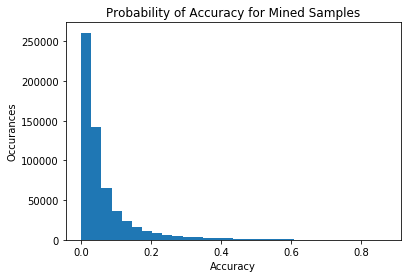

In [26]:
plt.show()

In [27]:
mined_train.describe()

,id,parent_answer_post_id,prob,question_id
count,5.938910e+05,5.938910e+05,593891.000000,5.938910e+05
mean,5.024786e+16,1.859959e+07,0.064413,1.672431e+07
std,9.187890e+16,1.260624e+07,0.085104,1.227807e+07
min,5.945950e+06,5.950000e+02,0.000030,5.020000e+02
25%,9.673907e+14,7.669063e+06,0.016376,6.196250e+06
50%,1.613794e+16,1.657090e+07,0.034263,1.416615e+07
75%,3.513231e+16,2.960653e+07,0.074638,2.565613e+07
max,4.276938e+17,4.277310e+07,0.869000,4.277182e+07


We see that the majority of samples in our dataset have a probability below 0.1

Let's see what samples with this level of probability look like.

In [28]:
import random

low_prob = mined_train.loc[mined_train['prob'] < 0.1]
high_prob = mined_train.loc[mined_train['prob'] > 0.6]

print("========= PROB > 60% =========")
print()
for i in range(5):
    rand = random.randint(0, len(high_prob))
    print("INTENT: " + high_prob.iloc[rand]["intent"])
    print("CODE: " + high_prob.iloc[rand]["snippet"])
    print("p=" + str(round(high_prob.iloc[rand]["prob"], 3)))
    print()
    
print ("========= PROB < 10% =========")
print()
for i in range(5):
    rand = random.randint(0, len(low_prob))
    print("INTENT: " + low_prob.iloc[rand]["intent"])
    print("CODE: " + low_prob.iloc[rand]["snippet"])
    print("p=" + str(round(low_prob.iloc[rand]["prob"], 3)))
    print()

========= PROB > 60% =========

INTENT: Python: simplest way to get list of values from dict?
CODE: list(d.values())
p=0.669

INTENT: Converting from a string to boolean in Python?
CODE: s in ['true', '1', 't', 'y', 'yes', 'yeah', 'yup', 'certainly', 'uh-huh']
p=0.659

INTENT: What's the Pythonic way to combine two sequences into a dictionary?
CODE: dict(zip(keys, values))
p=0.678

INTENT: listing files from a directory using glob python
CODE: glob.glob('[!hello]*.txt')
p=0.609

INTENT: Best way to remove elements from a list
CODE: [item for item in my_list if 1 <= item <= 5]
p=0.608

========= PROB < 10% =========

INTENT: Saving an animated GIF in Pillow
CODE: import Image
p=0.03

INTENT: python dont capitalize after apostrophe
CODE: self.restaurant_name = restaurant_name
self.cuisine_type = cuisine_type

def describe_restaurant(self):
    print(self.restaurant_name.title() + ' serves ' + self.cuisine_type)

def open_restaurant(self):
    Name = self.restaurant_name
print(' '.join([x

In [29]:
len(mined_train.loc[mined_train['prob'] > 0.6])

1116

### Potential concerns:

- Examples with a probability of less than 60% do not seem reasonably reliable to train on, but filtering these out we are left with only 1,116 datapoints.
- A lot of examples refer to obscure libraries. How will we gain information about all of these libraries?
- Not all intents have specified names or values for every variable necessary to produce code snippet.
    - How will these values be generated, and will this effect the accuracy score?
- Small dataset means our model will be familiar with a very limited number of situations.
    - We have approx 1116 mined + 2379 annoted examples, 3495 total useable samples

## Potential Alternative Datasets

#### StaQC https://github.com/LittleYUYU/StackOverflow-Question-Code-Dataset
Seems like the code snippets seem more accurate, but they are not limited in length. Probably too complex to generate. Potential work-arounds: subset this dataset to include only one-line snippets, or explore the methodolgy they used to mine our own code snippets.

#### EdinburgNLP https://github.com/LittleYUYU/StackOverflow-Question-Code-Dataset
Doc-to-code generation, BLEU score < 15%. This is more of a project than a dataset.

#### Pseudogen https://ahcweb01.naist.jp/pseudogen/
Also more of a project than a dataset. Generates pseudocode from python code.

#### Django https://github.com/odashi/ase15-django-dataset
This was used by one of the main preceding studies we saw in our lit review, https://arxiv.org/abs/1704.01696. It contains english and python snippets, and while it seems like it may have some more complex snippets (longer than one line), it is worth looking into.

# Word2Vec

In [31]:
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec

In [94]:
mined_train["intent"][0:10]

0                   Sort a nested list by two elements
1                 converting integer to list in python
2             Converting byte string in unicode string
3                      List of arguments with argparse
4    How to convert a Date string to a DateTime obj...
5    How to efficiently convert Matlab engine array...
6                  Converting html to text with Python
7      regex for repeating words in a string in Python
8            Ordering a list of dictionaries in python
9                  Two Combination Lists from One List
Name: intent, dtype: object

In [102]:
import string
from nltk import word_tokenize

def prep(lines):
    result = []
    for line in lines:
        if line != None:
            result.append(word_tokenize(line.lower()))
    return result

In [103]:
# size = 64, dimensions
# sg = 1, use Skip-Gram. If zero, it will use CBOW[]
# window = 10, context words (10 to the left and 10 to the right)
# min_count = 5, ignore words with frequency lower than that
# seed = 42, the answer to the universe, life and everything.
# workers = 2, number of worker threads.
intent_model = Word2Vec(sentences=prep(a_train["rewritten_intent"]), size=64, sg=1,
                 window=10, min_count=5, seed=42,
                 workers=2)

code_model = Word2Vec(sentences=prep(a_train["snippet"]), size=64, sg=1,
                 window=10, min_count=5, seed=42,
                 workers=2)

Concatenate elements of a list 'x' of multiple integers to a single integer
convert a list of integers into a single integer
convert a DateTime string back to a DateTime object of format '%Y-%m-%d %H:%M:%S.%f'
get the average of a list values for each key in dictionary `d`)
zip two lists `[1, 2]` and `[3, 4]` into a list of two tuples containing elements at the same index in each list
prepend string 'hello' to all items in list 'a'
regex for repeating words in a string `s`
normalize a pandas dataframe `df` by row
swap values in a tuple/list inside a list `mylist`
Swap values in a tuple/list in list `mylist`
None
find all occurrences of the pattern '\\[[^\\]]*\\]|\\([^\\)]*\\)|"[^"]*"|\\S+' within `strs`
generate the combinations of 3 from a set `{1, 2, 3, 4}`
add multiple columns `hour`, `weekday`, `weeknum` to pandas data frame `df` from lambda function `lambdafunc`
BeautifulSoup search string 'Elsie' inside tag 'a'
Convert a datetime object `my_datetime` into readable format `%B %d, 

divide the value for each key `k` in dict `d2` by the value for the same key `k` in dict `d1`
divide values associated with each key in dictionary `d1` from values associated with the same key in dictionary `d2`
write dataframe `df` to csv file `filename` with dates formatted as yearmonthday  `%Y%m%d`
remove a key 'key' from a dictionary `my_dict`
replace NaN values in array `a` with zeros
subprocess run command 'start command -flags arguments' through the shell
run command 'command -flags arguments &' on command line tools as separate processes
replace percent-encoded code in request `f` to their single-character equivalent
remove white spaces from the end of string "    xyz     "
Replace special characters in utf-8 encoded string `s` using the %xx escape
None
Create an array containing the conversion of string '100110' into separate elements
convert a string 'mystr' to numpy array of integer values
convert an rgb image 'messi5.jpg' into grayscale `img`
sort list `lst` in descending o

load json file 'sample.json' with utf-8 bom header
setup a smtp mail server to `smtp.gmail.com` with port `587`
revers correlating bits of integer `n`
add column `d` to index of dataframe `df`
Iterating over a dictionary `d` using for loops
Iterating over a dictionary `d` using for loops
Iterating key and items over dictionary `d`
Iterating key and items over dictionary `d`
get keys and items of dictionary `d`
get keys and items of dictionary `d` as a list
Iterating key and items over dictionary `d`
Iterating key and items over dictionary `d`
Iterating key and items over dictionary `d`
query all data from table `Task` where the value of column `time_spent` is bigger than 3 hours
compile Visual Studio project `project.sln` from the command line through python
get max key in dictionary `MyCount`
execute command 'source .bashrc; shopt -s expand_aliases; nuke -x scriptPath' from python script
get a name of function `my_function` as a string
None
check if all values in the columns of a nump

convert python 2 dictionary `a` to a list of tuples where the value is the first tuple element and the key is the second tuple element
convert a python dictionary 'a' to a list of tuples
convert a list of hex byte strings `['BB', 'A7', 'F6', '9E']` to a list of hex integers
convert the elements of list `L` from hex byte strings to hex integers
assign values to two variables, `var1` and `var2` from user input response to `'Enter two numbers here: ` split on whitespace
Filter a json from a key-value pair as `{'fixed_key_1': 'foo2'}` in Django
create a list containing a four elements long tuples of permutations of binary values
get yesterday's date as a string in `YYYY-MM-DD` format using timedelta
Get the dot product of matrix `[1,0,0,1,0,0]` and matrix `[[0,1],[1,1],[1,0],[1,0],[1,1],[0,1]]`
convert date strings in pandas dataframe column`df['date']` to pandas timestamps using the format '%d%b%Y'
Importing file `file` from folder '/path/to/application/app/folder'
do a `left` merge of da

np.array(map(int, '100110'))
print(np.array(list(mystr), dtype=int))
img = cv2.imread('messi5.jpg', 0)
lst.sort(key=lambda x: x[2], reverse=True)
indices = [i for i, x in enumerate(my_list) if x == 'whatever']
subprocess.call('grep -r PASSED *.log | sort -u | wc -l', shell=True)
len(my_text) - len(my_text.rstrip('?'))
df[df.columns[1:]].replace('[\\$,]', '', regex=True).astype(float)
df1.merge(df2, how='left', on='word')
print(''.join(''.join(i) for i in zip(a2, a1)) + a[-1] if len(a) % 2 else '')
root.attributes('-topmost', True)
root.lift()
hex(int(''.join([str(int(b)) for b in walls]), 2))
hex(sum(b << i for i, b in enumerate(reversed(walls))))
print(('Total score for', name, 'is', score))
print('Total score for {} is {}'.format(name, score))
print('Total score for %s is %s  ' % (name, score))
print(('Total score for', name, 'is', score))
url('^$', TemplateView.as_view(template_name='your_template.html'))
df[df['A'].isin([3, 6])]
instance.__class__.__name__
system('/path/to/my/venv/

list(df.index)
df.index
"""""".join(list(OrderedDict.fromkeys('aaabcabccd').keys()))
list(set('aaabcabccd'))
"""""".join(set('aaabcabccd'))
df.loc[(df.loc[:, (df.dtypes != object)] != 0).any(1)]
br.form.add_file(open(filename), 'text/plain', filename)
all(word in d for word in ['somekey', 'someotherkey', 'somekeyggg'])
subprocess.check_output(['espeak', text], stderr=subprocess.STDOUT)
df.fillna(method='ffill', inplace=True)
print(np.linspace(1, 3, num=4, endpoint=False))
print(np.linspace(1, 3, num=5))
kdll.CreateSymbolicLinkW('D:\\testdirLink', 'D:\\testdir', 1)
slice = [arr[i][0:2] for i in range(0, 2)]
upload_url = blobstore.create_upload_url('/upload', gs_bucket_name='my_bucket')
os.chdir(os.path.dirname(__file__))
func(*args)
df['AB'].str.split(' ', 1, expand=True)
df['A'], df['B'] = df['AB'].str.split(' ', 1).str
print(sorted(xs, key=len))
xs.sort(lambda x, y: cmp(len(x), len(y)))
xs.sort(key=lambda s: len(s))
ts.plot(marker='.')
lst = list(itertools.product([0, 1], repeat=n))
l

In [108]:
print("INTENT MODEL")
print(*list(intent_model.wv.vocab)[0:5], sep='\n')
print()
print("CODE MODEL")
print(*list(code_model.wv.vocab)[0:5], sep='\n')

INTENT MODEL
concatenate
elements
of
a
list

CODE MODEL
sum
(
d
*
10


In [110]:
def printSimilar(word, model):
    print(word.upper())
    for i in range(8):
        print(model.most_similar(word)[i][0])
    print()
        
printSimilar("list", intent_model)
printSimilar("array", intent_model)
printSimilar("x", code_model)
printSimilar("if", code_model)

LIST
tuples
containing
create
elements
items
l
lists
tuple

ARRAY
numpy
at
containing
every
create
elements
sum
index

X
sum
zip
len
reverse=true
l
key=lambda
==
sorted

IF
for
in
lst
list
pass
enumerate
d.items
sublist



/Users/mariah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
/Users/mariah/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Abstract Syntax Tree Encoding/Decoding

In [85]:
import ast
expr = mined_train.iloc[0]["snippet"]
expr_ast = ast.parse(expr)
expr_ast

ast.dump(expr_ast)

In [93]:
tree = ast.parse(expr_ast)
decoded = astor.to_source(t)
print("ORIGINAL: \n" + expr)
print("DECONVERTED FROM TREE: \n" + str(decoded))

ORIGINAL: 
sorted(l, key=lambda x: (-int(x[1]), x[0]))
DECONVERTED FROM TREE: 
sorted(l, key=lambda x: (-int(x[1]), x[0]))

